# Aufgabe 2

Durch Einzeichnen der Tangente an den Graphen $k = k(t)$ im Punkt $(0,400)$ findet man $t_\beta = 20\,\text{min}$.

Das bedeutet, es ist

$$
  \beta = \dfrac{1}{20\,\text{min}} = \dfrac{3}{\text{h}}
$$

Nach

$$
  t = -20\,\text{min}\cdot
  \ln\left(
       \dfrac{1100-900}{1100-400}
     \right)
    = 25.06\,\text{min}
$$

ist der Wert $k=900 ppM$ erreicht.

In [1]:
from sympy import *
init_printing()

from matplotlib import pyplot as plt, ticker as tk
%matplotlib inline
%config InlineBackend.figure_format='retina'

import numpy as np
import pandas as pd

from fun_expr import Function_from_Expression as FE

In [2]:
k_0 = k_au = 400e-6 
k_zul = k_inf = 1100e-6

beta = Rational(1,20) # min**(-1)

t = Symbol('t')
k = FE(t, k_inf + (k_0-k_inf)*exp(-beta*t),name='k')
k.equation()

<IPython.core.display.Math object>

In [3]:
-20*ln((1100-900)/(1100-400))

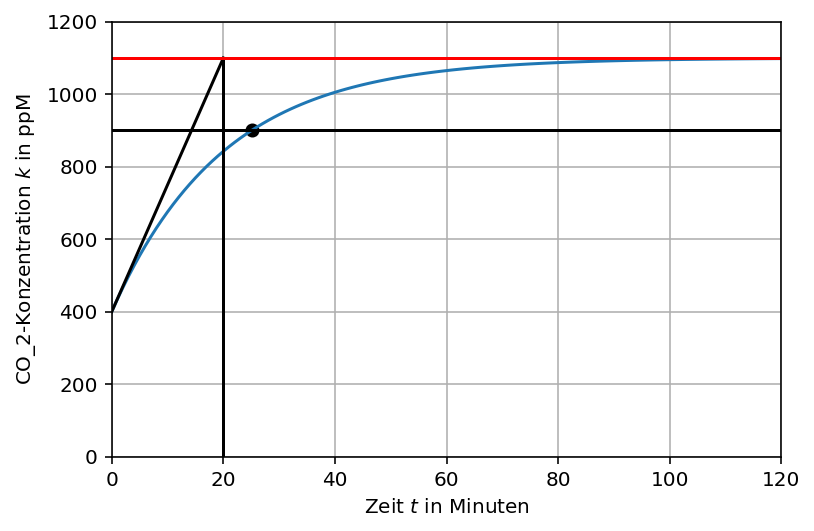

In [4]:
fig,ax = plt.subplots()

lt = np.linspace(0,120,121)
ax.plot(lt,1e6*k.lambdified(lt))

lt = np.linspace(0,20)
t_k = FE(t, 1e6*(k(0) + k.diff(t)(0)*t))
ax.plot(lt,t_k.lambdified(lt),c='k')
ax.plot(*zip(*[(20,1100),(20,0)]),c='k')

ax.set(
    xlim=(0,120),xlabel='Zeit $t$ in Minuten',
    ylim=(0,1200),ylabel='CO_2-Konzentration $k$ in ppM'
)

ax.axhline(1100,c='r')
ax.axhline(900,c='k')
ax.scatter(25.06,900,c='k')
ax.grid()
plt.savefig('U_03-A_2-Graph.pdf',bbox_inches='tight')